In [83]:
 # Load all certs from DER files. These will be complete certs with a reference to their signer/parent in the "issuer" field.
# Need a wrapper to support complete certs and issuers where we only have the reference to it.
import glob
import networkx as nx
from cryptography import x509
import lief

def add_to_graph(G, crt):
    # Add 
    try:
        G.add_nodes_from([crt.subject,crt.issuer])
        G.add_edge(crt.subject,crt.issuer)
    except nx.NetworkXError:
        print('Yikes!')
        print(crt.subject)
        print(crt.issuer)
    return G

certs={}
G = nx.DiGraph()
for filename in glob.glob('./pf/certs/*.crt', recursive=True):
    with open(filename, "rb") as f:
        crt = x509.load_der_x509_certificate(f.read())
        print(crt)
        add_to_graph(G,crt)
        # c2 = lief.parse(filename)  # f.read()

        # break
# G

<Certificate(subject=<Name(C=US,O=DigiCert Inc,OU=www.digicert.com,CN=DigiCert SHA2 Assured ID Code Signing CA)>, ...)>
<Certificate(subject=<Name(C=US,ST=Washington,L=Redmond,O=Microsoft Corporation,OU=Microsoft Operations Puerto Rico,OU=Thales TSS ESN:D9DE-E39A-43FE,CN=Microsoft Time-Stamp Service)>, ...)>
<Certificate(subject=<Name(C=US,ST=Washington,L=Redmond,O=Microsoft Corporation,OU=MOPR,OU=nCipher DSE ESN:728D-C45F-F9EB,CN=Microsoft Time-Stamp Service)>, ...)>
<Certificate(subject=<Name(C=US,ST=Washington,L=Redmond,O=Microsoft Corporation,OU=MOPR,OU=nCipher DSE ESN:148C-C4B9-2066,CN=Microsoft Time-Stamp Service)>, ...)>
<Certificate(subject=<Name(C=US,ST=Washington,L=Redmond,O=Microsoft Corporation,CN=Microsoft 3rd Party Application Component)>, ...)>
<Certificate(subject=<Name(C=US,ST=Washington,L=Redmond,O=Microsoft Corporation,CN=Microsoft Corporation)>, ...)>
<Certificate(subject=<Name(C=US,ST=Washington,L=Redmond,O=Microsoft Corporation,CN=Microsoft Windows)>, ...)>
<Certi

In [87]:
crt.issuer.public_bytes()


[<RelativeDistinguishedName(C=US)>,
 <RelativeDistinguishedName(O=Entrust\, Inc.)>,
 <RelativeDistinguishedName(CN=Entrust Extended Validation Code Signing CA - EVCS2)>]

In [75]:
lief.PE.x509.raw = 

lief._lief.PE.x509

In [61]:
crt.fingerprint(crt.signature_hash_algorithm).hex(":")

'0c:ea:84:86:85:49:40:38:d4:fb:c3:9a:4e:dd:f8:25:6d:5f:0b:b5:3d:46:81:ed:b0:5e:b7:42:2f:ca:b3:0c'

In [72]:
crt.issuer.rdns

[<RelativeDistinguishedName(C=US)>,
 <RelativeDistinguishedName(O=Entrust\, Inc.)>,
 <RelativeDistinguishedName(CN=Entrust Extended Validation Code Signing CA - EVCS2)>]

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))

colors = []
for deg in G.out_degree:
    if deg[1]:
        colors.append("blue")
    else:
        colors.append("red")


<Figure size 1000x1000 with 0 Axes>

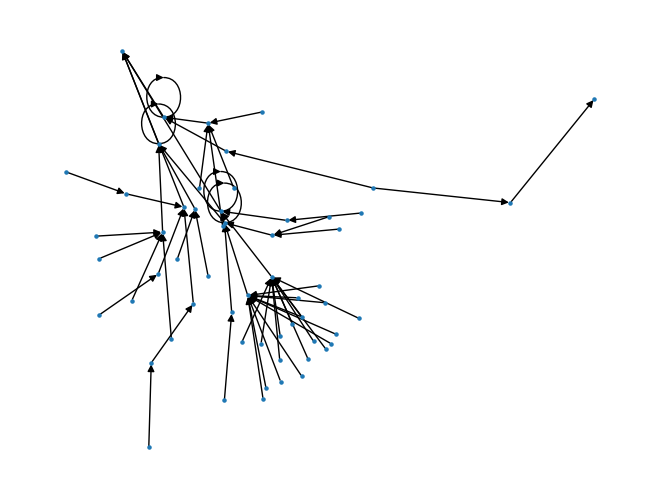

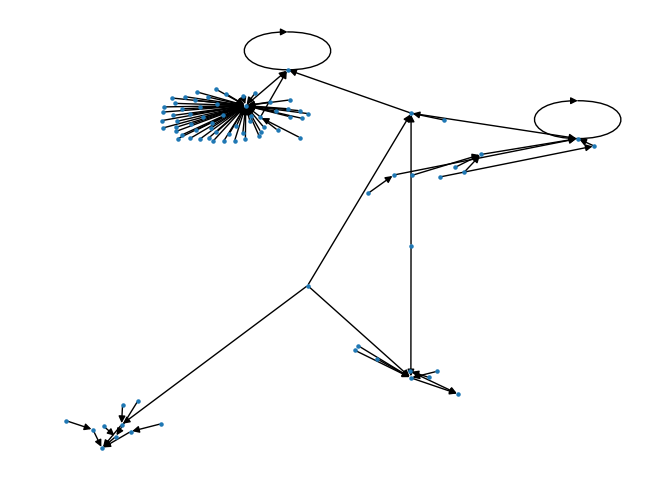

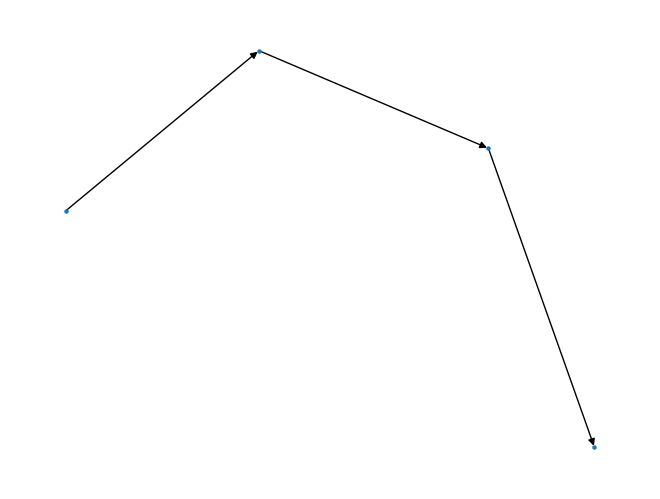

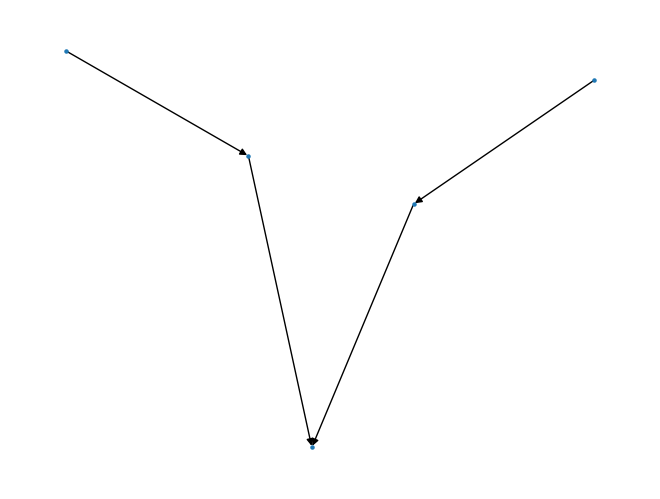

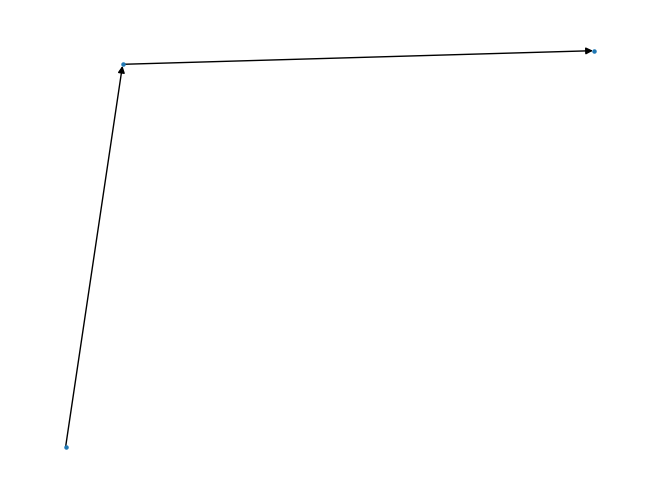

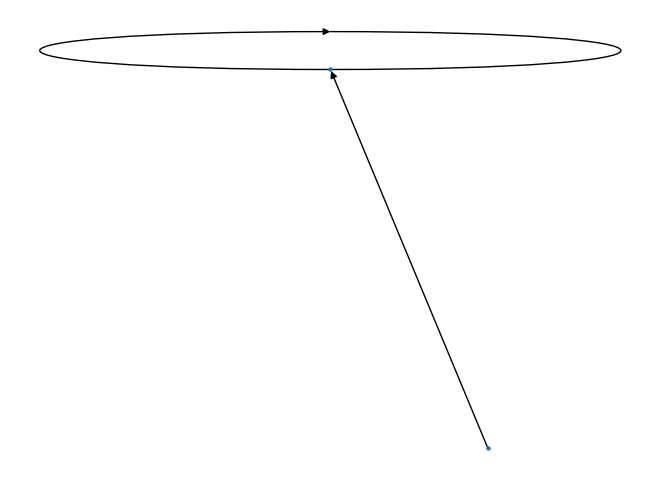

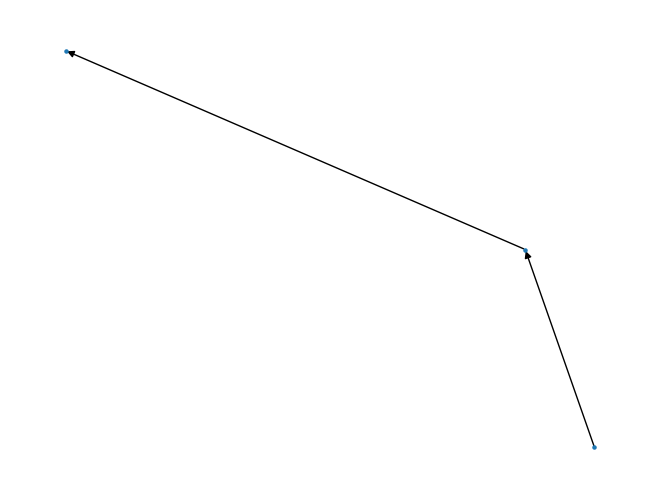

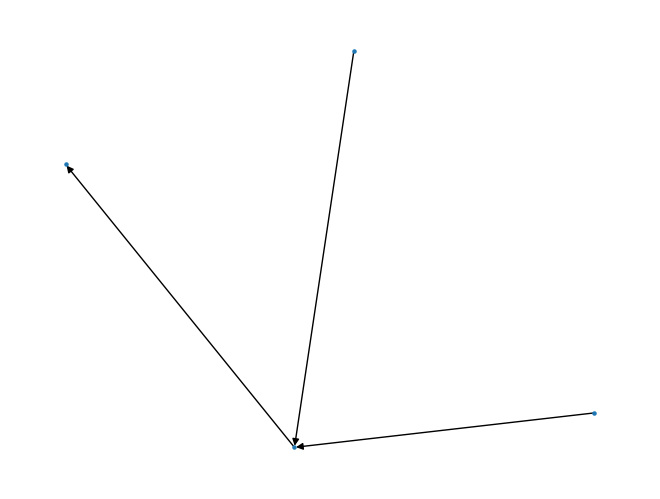

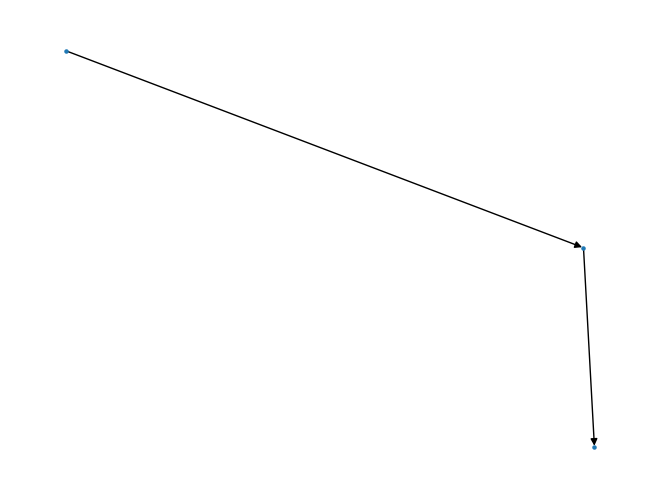

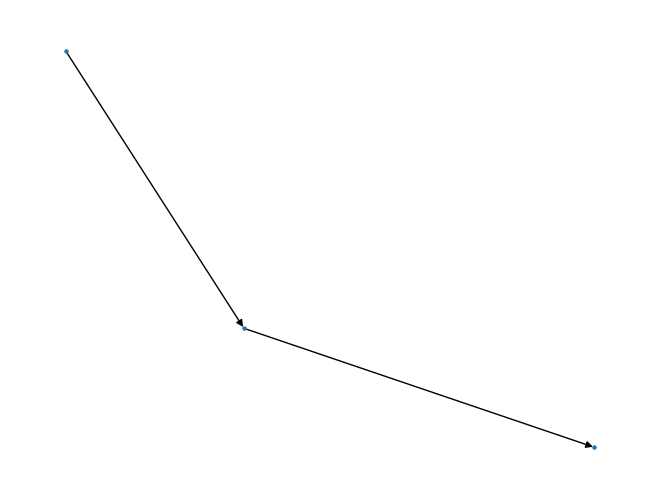

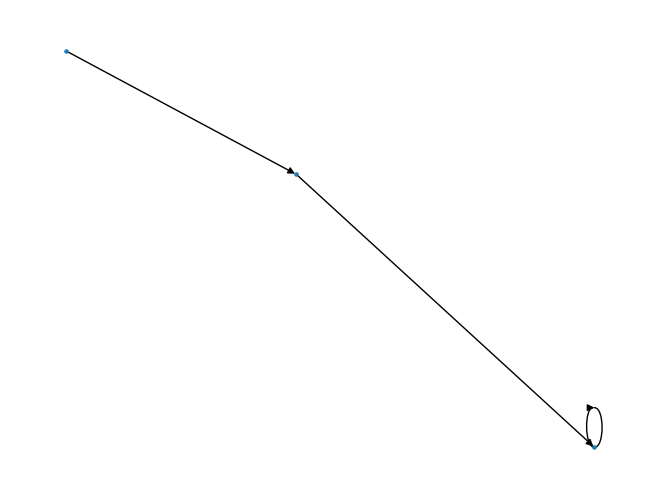

In [41]:
for gg in list(nx.weakly_connected_components(G)):
    g2 = G.subgraph(gg)
    nx.draw_spring(g2, node_size=5)  # , node_color=[colors[i] for i in gg])
    plt.show()

Multiple outs could be because you can issue several certificates to the same subject, i.e. if one is about to expire just give it an new one.
root cert can either be self-signed or cross-signed
for the root CA to be accepted, it's a complicated process. easier to get signed by somebody authoritative. want to be a root CA so you can issue them. x-signed usually temporary until people trust you

In [38]:
len(list(nx.weakly_connected_components(G)))

11

In [49]:
for node, deg in G.out_degree():
    if deg > 1 or deg == 0:
        print(node, deg)

<Name(C=US,O=DigiCert Inc,OU=www.digicert.com,CN=DigiCert Assured ID Root CA)> 2
<Name(C=US,ST=Washington,L=Redmond,O=Microsoft Corporation,CN=Microsoft Corporation)> 3
<Name(C=US,ST=Washington,L=Redmond,O=Microsoft Corporation,OU=MOPR,CN=Microsoft Corporation)> 2
<Name(C=ZA,ST=Western Cape,L=Durbanville,O=Thawte,OU=Thawte Certification,CN=Thawte Timestamping CA)> 0
<Name(C=US,ST=Washington,L=Redmond,O=Microsoft Corporation,CN=Microsoft Code Signing PCA)> 2
<Name(C=US,O=DigiCert Inc,OU=www.digicert.com,CN=DigiCert Trusted Root G4)> 3
<Name(C=US,ST=Washington,L=Redmond,O=Microsoft Corporation,CN=Microsoft Root Certificate Authority 2011)> 0
<Name(C=US,O=VeriSign\, Inc.,OU=VeriSign Trust Network,OU=(c) 2006 VeriSign\, Inc. - For authorized use only,CN=VeriSign Class 3 Public Primary Certification Authority - G5)> 2
<Name(C=US,O=VeriSign\, Inc.,OU=VeriSign Trust Network,OU=(c) 2008 VeriSign\, Inc. - For authorized use only,CN=VeriSign Universal Root Certification Authority)> 0
<Name(C=US,